##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**ASSIGNMENT 2 – DECISION TREES AND SUPPORT VECTOR MACHINES**
--------------------------------------------------------------------------------
*-Please rename the file as "TeamXX_Assignment2.ipynb"*

**_Team number: 12_**

---

(_In Title case, separated with commas_)
**_Full names of all students in the team:_**
Sai Karthik C, Aditya Abhiram, Paidisetty Sai Aditya, Ishan Harsh, Kamal Aditya M

---

(_Separated by commas_)
**_Id number of all students in the team:_**
2020B5A70762H, 2020B5A70937H, 2020B5A70987H, 2021A7PS2854H, 2020A7PS0054H

This assignment aims to identify the differences between three Machine Learning models.

# ***1. Preprocess and perform exploratory data analysis of the dataset obtained***

In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("./communities.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [4]:
#add column names
with open('column_names.txt', 'r') as file:
    lines = file.read().splitlines()

# Extract column names from the lines
column_names = [line.split()[1] for line in lines]

# Assign column names to the DataFrame
df.columns = column_names

# Verify the changes
print(df.head())

   state county community        communityname  fold  population  \
0      8      ?         ?         Lakewoodcity     1        0.19   
1     53      ?         ?          Tukwilacity     1        0.00   
2     24      ?         ?         Aberdeentown     1        0.00   
3     34      5     81440  Willingborotownship     1        0.04   
4     42     95      6096    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0           0.33          0.02          0.90          0.12  ...      0.12   
1           0.16          0.12          0.74          0.45  ...      0.02   
2           0.42          0.49          0.56          0.17  ...      0.01   
3           0.77          1.00          0.08          0.12  ...      0.02   
4           0.55          0.02          0.95          0.09  ...      0.04   

   PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0     0.26            0.20       0.06           0.0

In [5]:
df.dtypes

state                    int64
county                  object
community               object
communityname           object
fold                     int64
                        ...   
LemasPctPolicOnPatr     object
LemasGangUnitDeploy     object
LemasPctOfficDrugUn    float64
PolicBudgPerPop         object
ViolentCrimesPerPop    float64
Length: 128, dtype: object

In [6]:
df.drop(columns='communityname', inplace=True)
df.head()

,state,county,community,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,1,0.19,0.33,0.02,0.90,0.12,0.17,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,1,0.00,0.16,0.12,0.74,0.45,0.07,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,1,0.00,0.42,0.49,0.56,0.17,0.04,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,1,0.04,0.77,1.00,0.08,0.12,0.10,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,1,0.01,0.55,0.02,0.95,0.09,0.05,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [7]:
df = df.apply(pd.to_numeric, errors='coerce')
print(df.dtypes)

state                    int64
county                 float64
community              float64
fold                     int64
population             float64
                        ...   
LemasPctPolicOnPatr    float64
LemasGangUnitDeploy    float64
LemasPctOfficDrugUn    float64
PolicBudgPerPop        float64
ViolentCrimesPerPop    float64
Length: 127, dtype: object


In [8]:
# '?' to nan
df = df.replace('?',np.nan)
print(df.isnull().sum())
num_rows=df.shape[0]
print(num_rows)
total_missing_values = df.isna().sum().sum()
print("Total number of missing values in the DataFrame:", total_missing_values)



state                     0
county                 1174
community              1177
fold                      0
population                0
                       ... 
LemasPctPolicOnPatr    1675
LemasGangUnitDeploy    1675
LemasPctOfficDrugUn       0
PolicBudgPerPop        1675
ViolentCrimesPerPop       0
Length: 127, dtype: int64
1994
Total number of missing values in the DataFrame: 39202


In [9]:
#removing all the columns which have more than 1000 missing values
threshold = 1000
df.dropna(axis=1, thresh=df.shape[0] - threshold, inplace=True)


In [10]:
total_missing_values = df.isna().sum().sum()
print("Total number of missing values in the DataFrame:", total_missing_values)


Total number of missing values in the DataFrame: 1


In [11]:
df = df.fillna(df.mean())

In [12]:
total_missing_values = df.isna().sum().sum()
print("Total number of missing values in the DataFrame:", total_missing_values)


Total number of missing values in the DataFrame: 0


In [13]:
df1=df.copy()


In [14]:
intervals = [0.0,0.2,0.6,1.000]

# Create the categorical bins for the target variable
df1['target_bins'] = pd.cut(df1['ViolentCrimesPerPop'], bins=intervals, labels=False, include_lowest=True)
print(df1.shape)

(1994, 104)


In [15]:
df.head()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,8,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,53,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,24,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,34,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,42,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


In [16]:
X1=df1.drop(["ViolentCrimesPerPop","target_bins"],axis=1)
y1=df1["target_bins"]
X2=X1.copy()

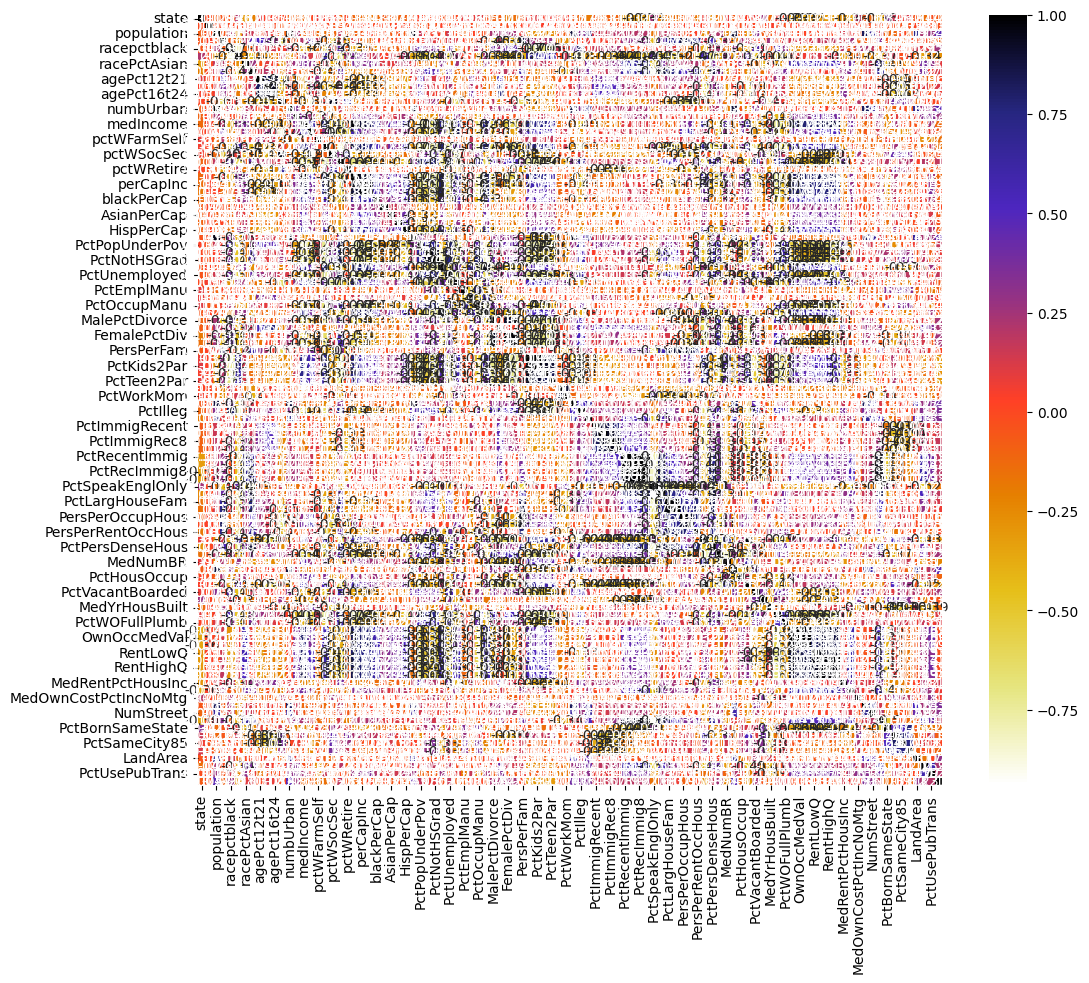

In [17]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [18]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [19]:
corr_features=correlation(X1,0.90)
print(len(set(corr_features)))
print(X1.shape)
set(corr_features)
X1=X1.drop(columns=corr_features)
X1.shape

31
(1994, 102)


(1994, 71)

Shape of X_scaled: (1994, 71)
Shape of features: (71, 1994)
Shape of cov_matrix: (71, 71)

Sneak Peak of the covariance matrix:

First 10 eigenvalues: [15.58125575  9.89673431  6.00904837  5.46625804  3.59412461  3.30008805
  2.85625372  2.24462157  1.51748163  1.44559433]


Last 10 eigenvalues: [0.04548448 0.04244365 0.02244356 0.02430858 0.02661546 0.02800568
 0.03982454 0.03601691 0.03417573 0.03111246]


/var/folders/8y/cssm2pjn5fq74m2wgx9cslsr0000gn/T/ipykernel_77663/541656415.py:21: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(eig_values[:102], use_line_collection = True)


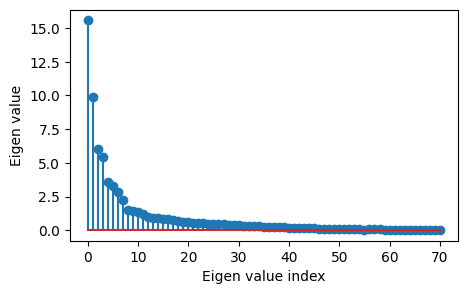

Eigenvectors upto 1 expresses 21.934424899468024 % variance
Eigenvectors upto 2 expresses 35.86649679958803 % variance
Eigenvectors upto 3 expresses 44.325700746287765 % variance
Eigenvectors upto 4 expresses 52.020794673351475 % variance
Eigenvectors upto 5 expresses 57.08040332609388 % variance
Eigenvectors upto 6 expresses 61.726083663995205 % variance
Eigenvectors upto 7 expresses 65.74695872732703 % variance
Eigenvectors upto 8 expresses 68.90681208668866 % variance
Eigenvectors upto 9 expresses 71.04303828703331 % variance
Eigenvectors upto 10 expresses 73.07806555842164 % variance
Eigenvectors upto 11 expresses 75.00104346693739 % variance
Eigenvectors upto 12 expresses 76.6496504378767 % variance
Eigenvectors upto 13 expresses 78.03830647214453 % variance
Eigenvectors upto 14 expresses 79.36497636565765 % variance
Eigenvectors upto 15 expresses 80.62221390663616 % variance
Eigenvectors upto 16 expresses 81.83186659973276 % variance
Eigenvectors upto 17 expresses 82.979237817212

In [20]:
X = X1.values
col_no=X1.shape[1]
mean_ = X.mean(axis =0)
std_ = X.std(axis=0)

X_scaled = (X-mean_)/std_
print(f'Shape of X_scaled: {X_scaled.shape}')
features = X_scaled.T
print(f'Shape of features: {features.shape}')
cov_matrix = np.cov(features)
print(f'Shape of cov_matrix: {cov_matrix.shape}')
print('\nSneak Peak of the covariance matrix:\n')
cov_matrix[0:5, 0:5]
eig_values, eig_vectors = np.linalg.eig(cov_matrix)



print(f'First 10 eigenvalues: {eig_values[:10]}')
print(f'\n\nLast 10 eigenvalues: {eig_values[-10:]}')
plt.figure(figsize=(5,3))
plt.stem(eig_values[:102], use_line_collection = True)
plt.xlabel('Eigen value index')
plt.ylabel('Eigen value')
plt.show()
for i in range(col_no):
    exp_var = np.sum(eig_values[:i+1])*100 / np.sum(eig_values)
    print(f'Eigenvectors upto {i+1} expresses {exp_var} % variance')
result = np.dot(X_scaled.reshape((-1, col_no)), eig_vectors[:,:50].reshape((col_no, -1)))
result.shape
X_new = pd.DataFrame()
for i in range(50):
    projected = X_scaled.dot(eig_vectors.T[i])
    X_new['PC'+str(i)] = projected   




In [21]:
X_new.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49
0,2.302278,0.387429,2.653746,0.586517,-0.949278,2.108505,0.501496,0.099017,-0.305480,0.629398,...,-0.658296,-0.095714,0.141695,-0.275408,-0.007511,0.080159,0.114563,-0.097248,-0.443790,-0.276425
1,0.221924,0.324474,2.767893,0.920026,1.240554,2.749155,3.190882,0.779405,0.136678,-1.817625,...,-0.111446,0.213222,0.241239,-0.283414,-0.318809,0.175416,0.007419,-0.323678,-0.279786,-0.374522
2,-0.922689,-1.754886,0.085793,0.535151,0.024471,1.517617,1.247109,-1.560448,-1.538354,0.240492,...,-0.019333,0.729245,-0.271839,-0.453631,-0.103274,-0.047989,0.261356,0.242302,-0.161575,0.531137
3,1.384694,2.033427,-2.264064,0.153777,-3.031430,-1.037113,1.841230,-4.181932,-2.184883,-0.224457,...,-0.787581,0.186918,-0.521498,0.434470,0.119679,0.446504,-0.527925,-0.622444,0.236007,-1.168425
4,4.941237,-0.904792,-2.124714,-0.082720,-1.315343,0.726998,-0.323037,0.435373,-0.666259,-0.876693,...,-0.154514,0.904354,0.218322,-0.075293,-0.517314,-0.188494,0.172131,0.352932,-0.356584,-0.347267


In [22]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X_new,
    y1,
    test_size=0.3,
    random_state=42)



In [23]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X1,
    y1,
    test_size=0.3,
    random_state=42)

# ***2. Decision tree model with entropy implementation***

## **_2.1 Implementation of the Model_**

In [24]:
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y, sample_weights=None):
        self.tree = self._build_tree(X, y, sample_weights, depth=0)

    def _build_tree(self, X, y, sample_weights, depth):
        num_samples, num_features = X.shape
        unique_classes, class_counts = np.unique(y, return_counts=True)
        default_class = unique_classes[np.argmax(class_counts)]

        # Base cases
        if depth == self.max_depth or len(np.unique(y)) == 1:
            return {'class': default_class, 'count': len(y)}

        # If sample weights are provided, compute the weighted Gini impurity
        if sample_weights is not None:
            total_weight = np.sum(sample_weights)
            weighted_gini = 1.0 - np.sum((np.sum(sample_weights[y == c]) / total_weight) ** 2 for c in unique_classes)
        else:
            weighted_gini = 1.0 - np.sum((np.sum(y == c) / num_samples) ** 2 for c in unique_classes)

        best_split = {'feature_index': None, 'threshold': None, 'gini': weighted_gini}

        # Iterate through each feature and find the best split
        for feature_index in range(num_features):
            unique_values = np.unique(X[:, feature_index])
            for threshold in unique_values:
                left_mask = X[:, feature_index] <= threshold
                right_mask = ~left_mask

                if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                    continue

                left_gini = self._calculate_gini(y[left_mask], sample_weights[left_mask] if sample_weights is not None else None)
                right_gini = self._calculate_gini(y[right_mask], sample_weights[right_mask] if sample_weights is not None else None)

                weighted_avg_gini = (np.sum(left_mask) * left_gini + np.sum(right_mask) * right_gini) / num_samples

                if weighted_avg_gini < best_split['gini']:
                    best_split = {
                        'feature_index': feature_index,
                        'threshold': threshold,
                        'gini': weighted_avg_gini,
                        'left_mask': left_mask,
                        'right_mask': right_mask
                    }

        if best_split['feature_index'] is None:
            return {'class': default_class, 'count': len(y)}

        left_subtree = self._build_tree(X[best_split['left_mask']], y[best_split['left_mask']], sample_weights, depth + 1)
        right_subtree = self._build_tree(X[best_split['right_mask']], y[best_split['right_mask']], sample_weights, depth + 1)

        return {
            'feature_index': best_split['feature_index'],
            'threshold': best_split['threshold'],
            'left': left_subtree,
            'right': right_subtree
        }

    def _calculate_gini(self, labels, weights=None):
        num_samples = len(labels)
        if weights is None:
            weights = np.ones(num_samples) / num_samples

        unique_classes, class_counts = np.unique(labels, return_counts=True)
        gini = 1.0 - np.sum((np.sum(weights[labels == c]) / np.sum(weights)) ** 2 for c in unique_classes)

        return gini

    def predict(self, X):
        if self.tree is None:
            raise ValueError("Tree not fitted. Call fit() first.")

        return np.array([self._predict_tree(x, self.tree) for x in X])

    def _predict_tree(self, x, node):
        if 'class' in node:
            return node['class']

        if x[node['feature_index']] <= node['threshold']:
            return self._predict_tree(x, node['left'])
        else:
            return self._predict_tree(x, node['right'])

In [25]:

DecisionTree = DecisionTree(max_depth=7)
X_train_array = X_train1.values
y_train_array = y_train1.values
X_test_array = X_test1.values
y_test_array = y_test1.values
DecisionTree.fit(X_train_array,y_train_array)

y_pred = DecisionTree.predict(X_test_array)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_array,y_pred)
print(f'Accuracy: {accuracy}')

/var/folders/8y/cssm2pjn5fq74m2wgx9cslsr0000gn/T/ipykernel_77663/2350801644.py:23: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  weighted_gini = 1.0 - np.sum((np.sum(y == c) / num_samples) ** 2 for c in unique_classes)
/var/folders/8y/cssm2pjn5fq74m2wgx9cslsr0000gn/T/ipykernel_77663/2350801644.py:70: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  gini = 1.0 - np.sum((np.sum(weights[labels == c]) / np.sum(weights)) ** 2 for c in unique_classes)


Accuracy: 0.7362270450751253


## **_2.2 Insights drawn (plots, markdown explanations)_**

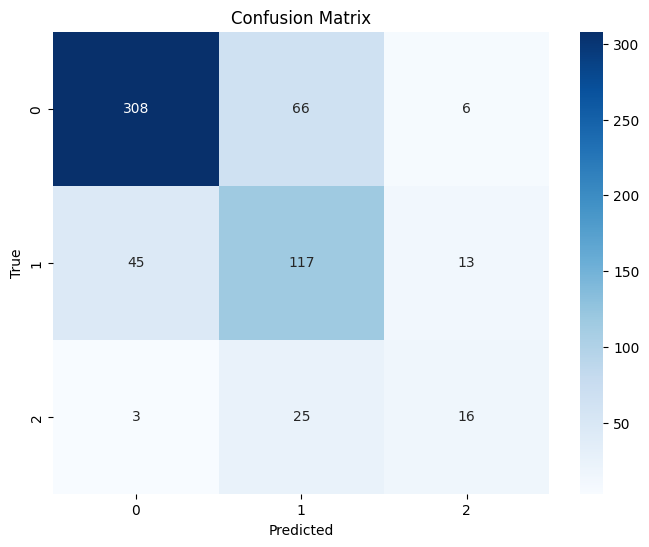

Tree Structure:
Feature PC0 <= -0.20352227283318539
  Feature PC0 <= -3.120088799719813
    Feature PC2 <= -0.043469163012343146
      Feature PC35 <= -0.5673786742637349
        Feature PC36 <= 0.3656600456177286
          Feature PC6 <= -1.867830483992641
            Feature PC0 <= -3.6857171869356113
              Class: 0, Count: 1
              Class: 1, Count: 1
            Class: 2, Count: 9
          Feature PC24 <= -0.15240262605721516
            Feature PC0 <= -6.753307063834892
              Class: 2, Count: 1
              Class: 0, Count: 2
            Class: 1, Count: 6
        Feature PC36 <= -1.097704034645209
          Class: 0, Count: 4
          Feature PC6 <= -3.2342399483407758
            Feature PC49 <= -0.17126743340501518
              Class: 0, Count: 11
              Class: 1, Count: 6
            Feature PC33 <= 1.0792433512475477
              Class: 1, Count: 110
              Class: 2, Count: 3
      Feature PC0 <= -4.927804494796778
        Feature PC17

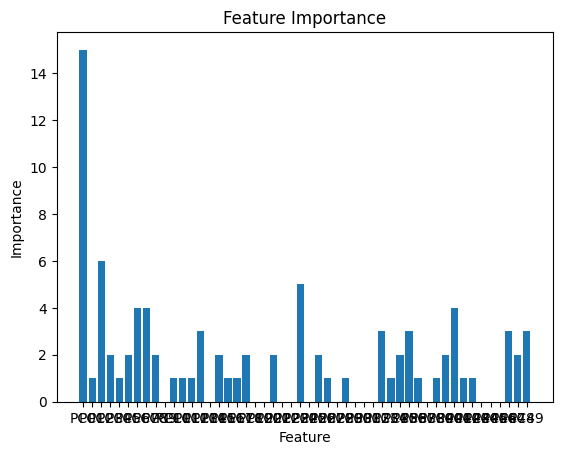

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_array, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test_array),
            yticklabels=np.unique(y_test_array))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


def plot_tree_structure(tree, depth=0, feature_names=None, class_names=None):
    if depth == 0:
        print("Tree Structure:")
    indent = "  " * depth
    if 'class' in tree:
        print(f"{indent}Class: {tree['class']}, Count: {tree['count']}")
    else:
        print(f"{indent}Feature {feature_names[tree['feature_index']]} <= {tree['threshold']}")
        plot_tree_structure(tree['left'], depth + 1, feature_names, class_names)
        plot_tree_structure(tree['right'], depth + 1, feature_names, class_names)

# Assuming X_train1.columns contains feature names
plot_tree_structure(DecisionTree.tree, feature_names=X_train1.columns)


def plot_feature_importance(tree, feature_names):
    feature_importance = np.zeros(len(feature_names))
    
    def traverse_tree(node, importance):
        if 'feature_index' in node:
            importance[node['feature_index']] += 1  # Increment the count for each split
            traverse_tree(node['left'], importance)
            traverse_tree(node['right'], importance)
    
    traverse_tree(tree, feature_importance)
    
    plt.bar(range(len(feature_names)), feature_importance, tick_label=feature_names)
    plt.title("Feature Importance")
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.show()

# Assuming X_train1.columns contains feature names
plot_feature_importance(DecisionTree.tree, feature_names=X_train1.columns)

In [27]:
from sklearn.metrics import classification_report

report = classification_report(y_test1, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       380
           1       0.56      0.67      0.61       175
           2       0.46      0.36      0.41        44

    accuracy                           0.74       599
   macro avg       0.63      0.61      0.62       599
weighted avg       0.75      0.74      0.74       599



#***3. Adaboost***

## **_3.1 Implementation of the Model_**

In [28]:
import numpy as np
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y, sample_weights=None):
        self.tree = self._build_tree(X, y, sample_weights, depth=0)

    def _build_tree(self, X, y, sample_weights, depth):
        num_samples, num_features = X.shape
        unique_classes, class_counts = np.unique(y, return_counts=True)
        default_class = unique_classes[np.argmax(class_counts)]

        # Base cases
        if depth == self.max_depth or len(np.unique(y)) == 1:
            return {'class': default_class, 'count': len(y)}

        # If sample weights are provided, compute the weighted Gini impurity
        if sample_weights is not None:
            total_weight = np.sum(sample_weights)
            weighted_gini = 1.0 - np.sum((np.sum(sample_weights[y == c]) / total_weight) ** 2 for c in unique_classes)
        else:
            weighted_gini = 1.0 - np.sum((np.sum(y == c) / num_samples) ** 2 for c in unique_classes)

        best_split = {'feature_index': None, 'threshold': None, 'gini': weighted_gini}

        # Iterate through each feature and find the best split
        for feature_index in range(num_features):
            unique_values = np.unique(X[:, feature_index])
            for threshold in unique_values:
                left_mask = X[:, feature_index] <= threshold
                right_mask = ~left_mask

                if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                    continue

                left_gini = self._calculate_gini(y[left_mask], sample_weights[left_mask] if sample_weights is not None else None)
                right_gini = self._calculate_gini(y[right_mask], sample_weights[right_mask] if sample_weights is not None else None)

                weighted_avg_gini = (np.sum(left_mask) * left_gini + np.sum(right_mask) * right_gini) / num_samples

                if weighted_avg_gini < best_split['gini']:
                    best_split = {
                        'feature_index': feature_index,
                        'threshold': threshold,
                        'gini': weighted_avg_gini,
                        'left_mask': left_mask,
                        'right_mask': right_mask
                    }

        if best_split['feature_index'] is None:
            return {'class': default_class, 'count': len(y)}

        left_subtree = self._build_tree(X[best_split['left_mask']], y[best_split['left_mask']], sample_weights, depth + 1)
        right_subtree = self._build_tree(X[best_split['right_mask']], y[best_split['right_mask']], sample_weights, depth + 1)

        return {
            'feature_index': best_split['feature_index'],
            'threshold': best_split['threshold'],
            'left': left_subtree,
            'right': right_subtree
        }

    def _calculate_gini(self, labels, weights=None):
        num_samples = len(labels)
        if weights is None:
            weights = np.ones(num_samples) / num_samples

        unique_classes, class_counts = np.unique(labels, return_counts=True)
        gini = 1.0 - np.sum((np.sum(weights[labels == c]) / np.sum(weights)) ** 2 for c in unique_classes)

        return gini

    def predict(self, X):
        if self.tree is None:
            raise ValueError("Tree not fitted. Call fit() first.")

        return np.array([self._predict_tree(x, self.tree) for x in X])

    def _predict_tree(self, x, node):
        if 'class' in node:
            return node['class']

        if x[node['feature_index']] <= node['threshold']:
            return self._predict_tree(x, node['left'])
        else:
            return self._predict_tree(x, node['right'])        
from sklearn.metrics import accuracy_score

# Convert DataFrames to numpy arrays
X_train_array = X_train2.values
y_train_array = y_train2.values
X_test_array = X_test2.values
y_test_array = y_test2.values

# Number of weak learners (decision stumps)
n_estimators = 50

# Initialize weights for data points
weights = np.ones(len(X_train_array)) / len(X_train_array)

# List to store weak learners
weak_learners = []

for _ in range(n_estimators):
    # Create a weak learner (decision stump)
    weak_learner = DecisionTree(max_depth=1)
    
    # Train the weak learner on the weighted data
    weak_learner.fit(X_train_array, y_train_array, sample_weights=weights)
    
    # Make predictions on the training set
    predictions = weak_learner.predict(X_train_array)
    
    # Calculate the error of the weak learner
    error = np.sum(weights * (predictions != y_train_array)) / np.sum(weights)
    
    # Calculate the weight of the weak learner
    alpha = 0.5 * np.log((1 - error) / error)
    
    # Update weights based on the correctness of predictions
    weights = weights * np.exp(-alpha * y_train_array * predictions)
    weights /= np.sum(weights)
    
    # Save the weak learner and its weight
    weak_learners.append((weak_learner, alpha))

# Make predictions on the test set
final_predictions = np.zeros(len(X_test_array))

for learner, alpha in weak_learners:
    learner_predictions = alpha * learner.predict(X_test_array)
    final_predictions += learner_predictions

# Convert final predictions to binary values
final_predictions = np.sign(final_predictions)

# Evaluate the accuracy
accuracy1 = accuracy_score(y_test_array, final_predictions)
print(f'Accuracy: {accuracy1}')


/var/folders/8y/cssm2pjn5fq74m2wgx9cslsr0000gn/T/ipykernel_77663/3805669546.py:22: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  weighted_gini = 1.0 - np.sum((np.sum(sample_weights[y == c]) / total_weight) ** 2 for c in unique_classes)
/var/folders/8y/cssm2pjn5fq74m2wgx9cslsr0000gn/T/ipykernel_77663/3805669546.py:71: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  gini = 1.0 - np.sum((np.sum(weights[labels == c]) / np.sum(weights)) ** 2 for c in unique_classes)


Accuracy: 0.7212020033388982


## **_3.2 Insights drawn (plots, markdown explanations)_**

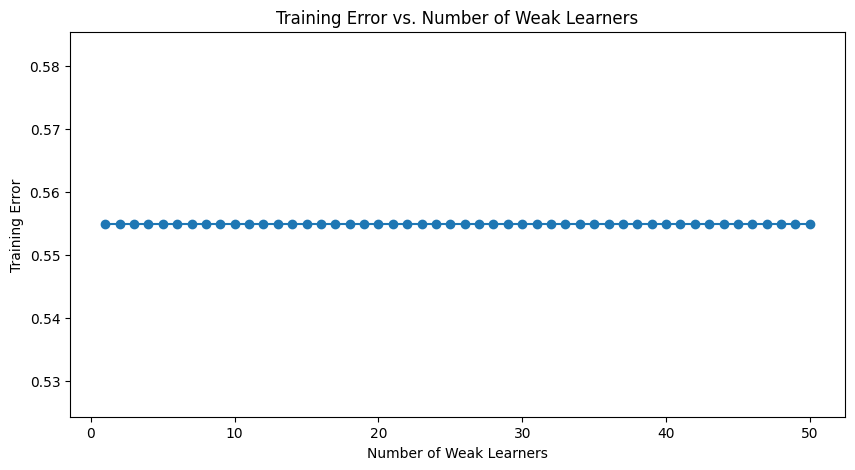

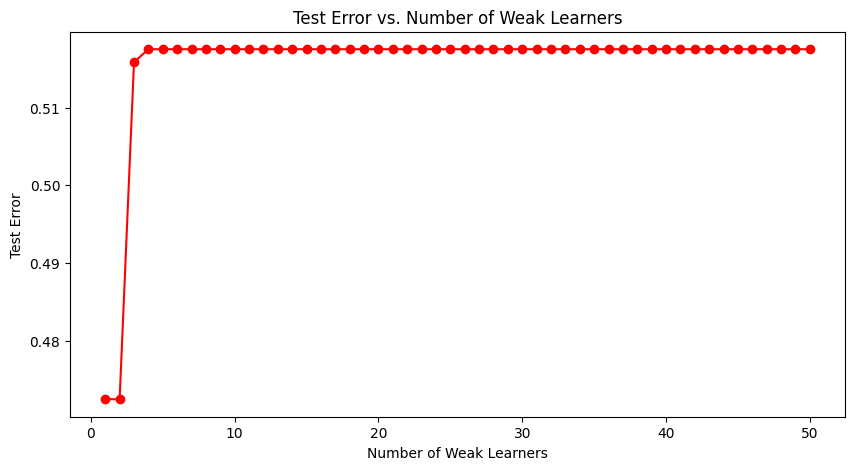

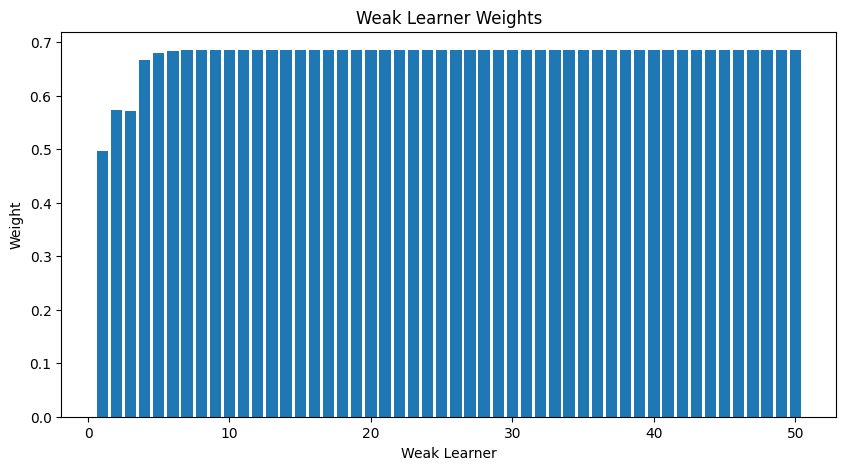

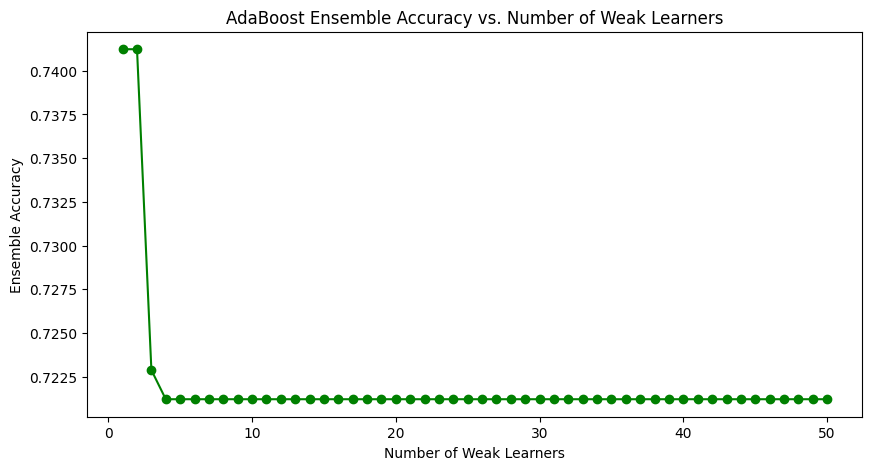

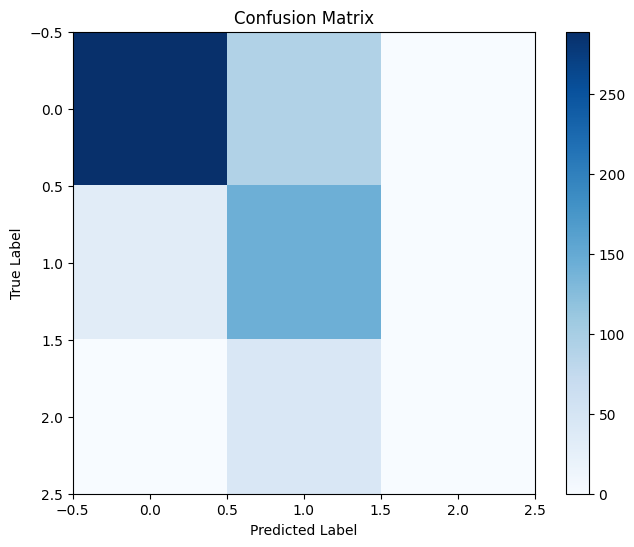

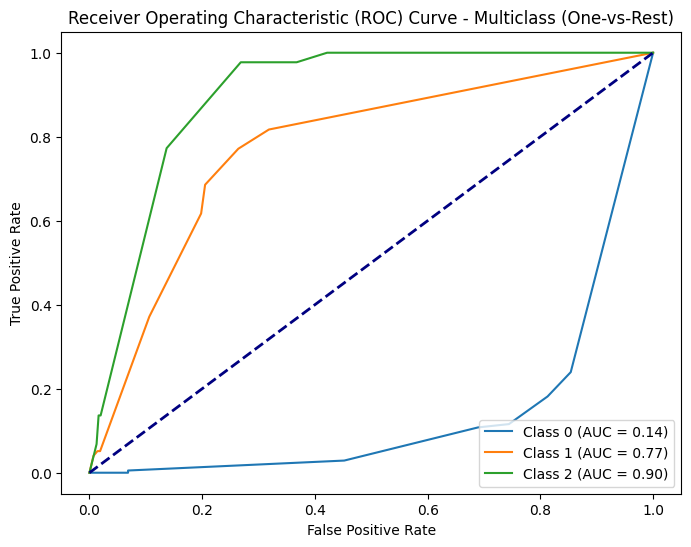

In [29]:
import matplotlib.pyplot as plt

def calculate_error(predictions, true_labels, weights=None):
    if weights is None:
        weights = np.ones(len(true_labels)) / len(true_labels)
    return np.sum(weights * (predictions != true_labels)) / np.sum(weights)

# Training Error Plot
train_errors = []
for learner, alpha in weak_learners:
    train_predictions = sum(alpha * learner.predict(X_train_array) for learner, alpha in weak_learners)
    train_error = calculate_error(train_predictions, y_train_array)
    train_errors.append(train_error)

plt.figure(figsize=(10, 5))
plt.plot(range(1, n_estimators + 1), train_errors, marker='o')
plt.title('Training Error vs. Number of Weak Learners')
plt.xlabel('Number of Weak Learners')
plt.ylabel('Training Error')
plt.show()

# Test Error Plot
test_errors = []
for num_learners in range(1, n_estimators + 1):
    test_predictions = sum(alpha * learner.predict(X_test_array) for learner, alpha in weak_learners[:num_learners])
    test_error = calculate_error(test_predictions, y_test_array)
    test_errors.append(test_error)

plt.figure(figsize=(10, 5))
plt.plot(range(1, n_estimators + 1), test_errors, marker='o', color='red')
plt.title('Test Error vs. Number of Weak Learners')
plt.xlabel('Number of Weak Learners')
plt.ylabel('Test Error')
plt.show()

# Weak Learner Weight Plot
learner_weights = [alpha for learner, alpha in weak_learners]

plt.figure(figsize=(10, 5))
plt.bar(range(1, n_estimators + 1), learner_weights)
plt.title('Weak Learner Weights')
plt.xlabel('Weak Learner')
plt.ylabel('Weight')
plt.show()

from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix

# ... (Previous code)

# ROC Curve
from sklearn.preprocessing import label_binarize

def plot_roc_curve_multiclass(X_test, y_test, weak_learners):
    classes = np.unique(y_test)
    n_classes = len(classes)
    final_predictions_proba = np.zeros((len(y_test), n_classes))

    for i, class_label in enumerate(classes):
        # Binarize the labels for the current class
        y_binary = label_binarize(y_test, classes=classes)
        
        # Sum the weighted predictions for the current class
        final_predictions_proba[:, i] = sum(alpha * learner.predict(X_test) for learner, alpha in weak_learners)

    plt.figure(figsize=(8, 6))
    
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_binary[:, i], final_predictions_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass (One-vs-Rest)')
    plt.legend(loc='lower right')
    plt.show()





# Precision-Recall Curve
def plot_precision_recall_curve(X_test, y_test, weak_learners):
    final_predictions_proba = sum(alpha * learner.predict(X_test) for learner, alpha in weak_learners)
    precision, recall, _ = precision_recall_curve(y_test, final_predictions_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='upper right')
    plt.show()

# Confusion Matrix
def plot_confusion_matrix(X_test, y_test, weak_learners):
    final_predictions = np.sign(sum(alpha * learner.predict(X_test) for learner, alpha in weak_learners))
    cm = confusion_matrix(y_test, final_predictions)

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# AdaBoost Ensemble Accuracy
ensemble_accuracies = []
for num_learners in range(1, n_estimators + 1):
    ensemble_predictions = np.sign(sum(alpha * learner.predict(X_test_array) for learner, alpha in weak_learners[:num_learners]))
    ensemble_accuracy = accuracy_score(y_test_array, ensemble_predictions)
    ensemble_accuracies.append(ensemble_accuracy)

plt.figure(figsize=(10, 5))
plt.plot(range(1, n_estimators + 1), ensemble_accuracies, marker='o', color='green')
plt.title('AdaBoost Ensemble Accuracy vs. Number of Weak Learners')
plt.xlabel('Number of Weak Learners')
plt.ylabel('Ensemble Accuracy')
plt.show()



# Plot Confusion Matrix
plot_confusion_matrix(X_test_array, y_test_array, weak_learners)


# Example usage
plot_roc_curve_multiclass(X_test_array, y_test_array, weak_learners)

In [30]:
from sklearn.metrics import classification_report

report = classification_report(y_test1, final_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       380
           1       0.51      0.82      0.63       175
           2       0.00      0.00      0.00        44

    accuracy                           0.72       599
   macro avg       0.47      0.53      0.49       599
weighted avg       0.72      0.72      0.71       599



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

# **_4. Multiclass SVM_**

## **_4.1 Implementation of the Model_**

In [31]:

class MulticlassSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.classifiers = []

    def fit(self, X, y):
        unique_labels = np.unique(y)
        num_classes = len(unique_labels)

        for i in range(num_classes - 1):
            for j in range(i + 1, num_classes):
                class_i, class_j = unique_labels[i], unique_labels[j]

                # Prepare binary dataset
                mask = np.logical_or(y == class_i, y == class_j)
                binary_X = X[mask]
                binary_y = np.where(y[mask] == class_i, -1, 1)

                # Train binary classifier
                classifier = self._train_binary_svm(binary_X, binary_y)
                self.classifiers.append((classifier, class_i, class_j))

    def _train_binary_svm(self, X, y):
        n_samples, n_features = X.shape
        weights = np.zeros(n_features)
        bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, weights) - bias) >= 1
                if condition:
                    weights -= self.learning_rate * (2 * self.lambda_param * weights)
                else:
                    weights -= self.learning_rate * (2 * self.lambda_param * weights - y[idx] * x_i)
                    bias -= self.learning_rate * y[idx]

        return weights, bias

    def predict_binary(self, X, classifier):
        weights, bias = classifier
        return np.sign(np.dot(X, weights) - bias)

    def predict(self, X):
        num_samples = X.shape[0]
        num_classifiers = len(self.classifiers)
        num_classes = len(np.unique([class_i for _, class_i, _ in self.classifiers]))

        votes = np.zeros((num_samples, num_classes))

        for classifier, class_i, class_j in self.classifiers:
            binary_pred = self.predict_binary(X, classifier)

            for k in range(num_samples):
                if binary_pred[k] == -1:
                    votes[k, np.where(class_i == np.unique([class_i, class_j]))] += 1
                else:
                    votes[k, np.where(class_j == np.unique([class_i, class_j]))] += 1

        return np.argmax(votes, axis=1)

# Testing
if __name__ == "__main__":
    # Imports

    clf = MulticlassSVM()
    clf.fit(X_train1.to_numpy(), y_train1.to_numpy())
    predictions = clf.predict(X_test1.to_numpy())

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    print("Multiclass SVM classification accuracy", accuracy(y_test1, predictions))

Multiclass SVM classification accuracy 0.7178631051752922


## **_4.2 Insights drawn (plots, markdown explanations)_**

In [39]:
def plot_confusion_matrix(y_true, y_pred, classes):
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(len(classes), len(classes)))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
        plt.title("Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()

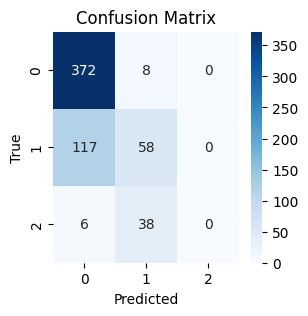

In [40]:
plot_confusion_matrix(y_test1, predictions, classes=np.unique(y_test1))


In [33]:
from sklearn.metrics import classification_report

report = classification_report(y_test1, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.98      0.85       380
           1       0.56      0.33      0.42       175
           2       0.00      0.00      0.00        44

    accuracy                           0.72       599
   macro avg       0.44      0.44      0.42       599
weighted avg       0.64      0.72      0.66       599



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

# **_5. References_**

1.   List item
2.   List item

